# Atividade: Histograma e Binarização de Imagens

Existem diversos módulos de processamento de imagens para Python, como Pillow, OpenCV-Python, SimpleITK. Para esta atividade, recomendo o _scikit-image_. Vou mostrar um exemplo de como abrir uma imagem e gerar o histograma.

In [1]:
!pip install imshowpair

In [2]:
from skimage import io, exposure
import numpy as np
import matplotlib.pyplot as plt
from imshowpair import imshowpair

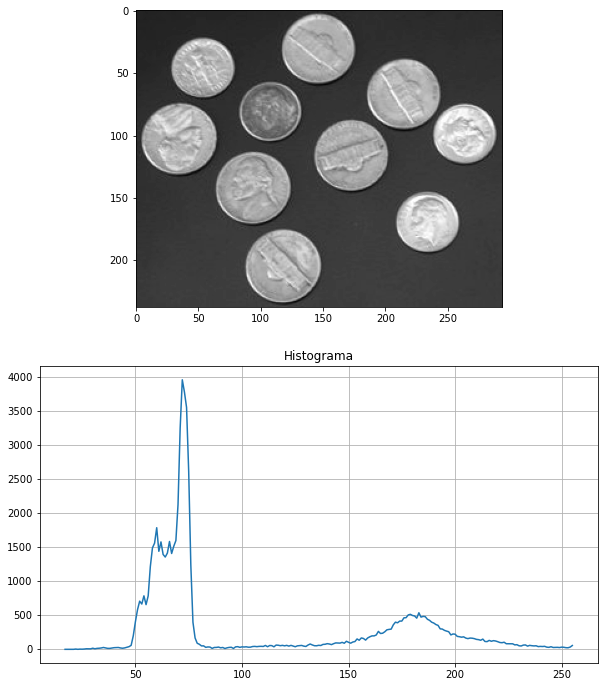

In [3]:
fingerprint = io.imread('coins.jpg')
hist_y, hist_x = exposure.histogram(fingerprint)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))
ax1.imshow(fingerprint, cmap=plt.cm.gray)
ax2.set_title('Histograma')
ax2.plot(hist_x, hist_y)
ax2.grid()
plt.show()

Nos itens seguintes, quando solicitado a mostrar a imagem resultante, use `imshowpair` [1] para mostrá-la lado a lado com a imagem original.

## Histograma

1. Compute o histograma da imagem _fingerprint_ [2] e apresente.

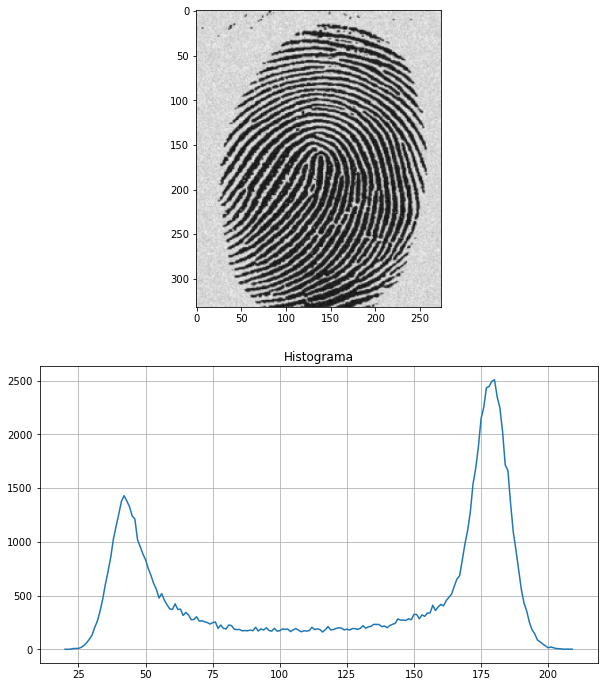

In [4]:
img = io.imread('fingerprint.jpg')
hist_y, hist_x = exposure.histogram(img)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))
ax1.imshow(img, cmap=plt.cm.gray)
ax2.set_title('Histograma')
ax2.plot(hist_x, hist_y)
ax2.grid()

2. Na imagem _fingerprint_ [2], é possível distinguir o fundo e a impressão digital observando o histograma?

sim

## Binarização

3. Qual limite poderia ser usado para binarizar a imagem *fingerprint*? Observe e apresente o histograma, teste e mostre a imagem binarizada resultante lado a lado com a imagem original usando `imshowpair`.

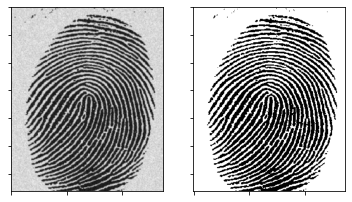

In [5]:
imshowpair(img, img>100, cmap=plt.cm.gray)

4. De forma semelhante, que limite poderia ser usado para binarizar a imagem _son1_ ou _darkerforeground_ [3]? Mostre o resultado.

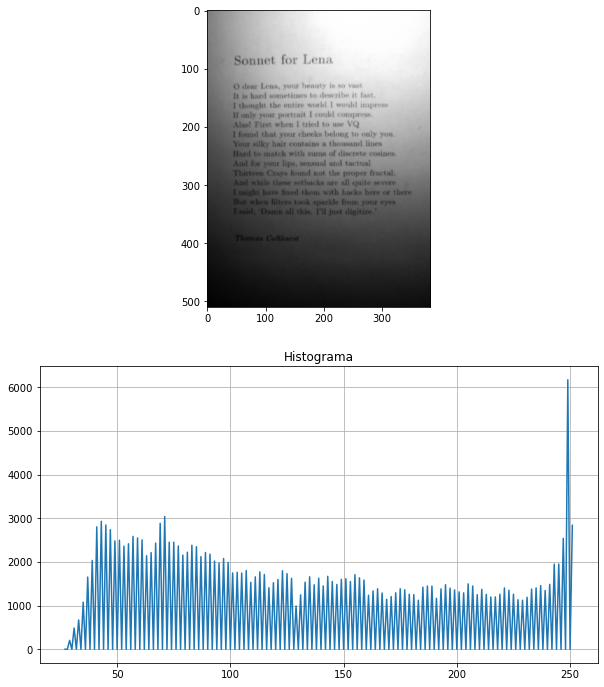

In [6]:
img = io.imread('son1.gif')
hist_y, hist_x = exposure.histogram(img)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))
ax1.imshow(img, cmap=plt.cm.gray)
ax2.set_title('Histograma')
ax2.plot(hist_x, hist_y)
ax2.grid()
plt.show()

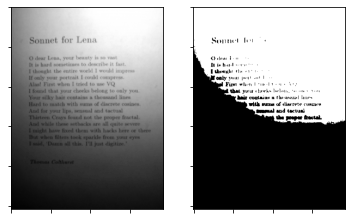

In [7]:
imshowpair(img, img>130, cmap=plt.cm.gray) #buaa (onomatopeia de choro)

5. Verifique que a binarização global da imagem _son1_ ou _darkerforeground_ [3] não provê um bom resultado. Use um limiar adaptativo (`threshold_local` no módulo _Scikit Image_ a partir da versão 0.13 [4] e mostre o resultado.

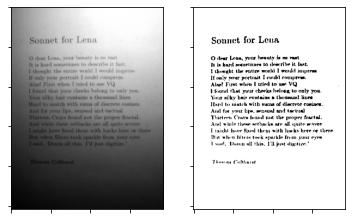

In [8]:
from skimage.filters import threshold_otsu, threshold_local


block_size = 35
local_thresh = threshold_local(img, block_size, offset=10)
imshowpair(img, img > local_thresh, cmap=plt.cm.gray) #iupiiii (onomatopeia de felicidade)

6. Observe o histograma da imagem _pout_ [5]. O que você pode concluir?

bem cinzenta, né? deve ser difícil fazer a binarização dela

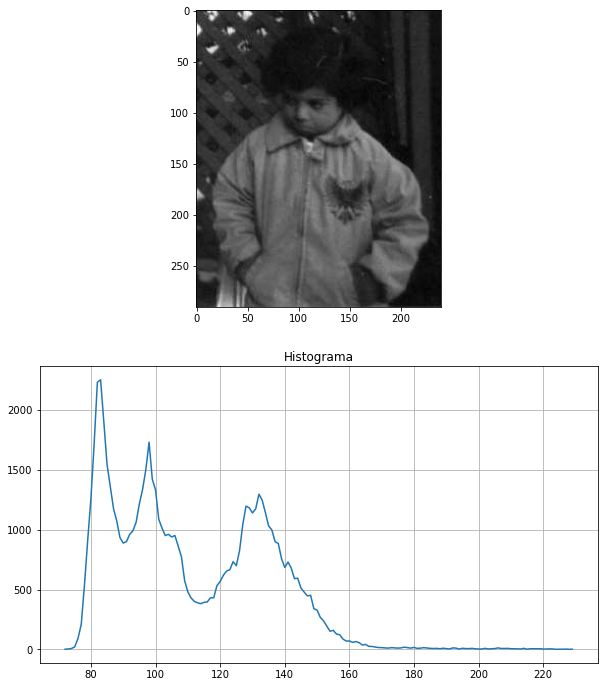

In [9]:
img = io.imread('pout.jpg')
hist_y, hist_x = exposure.histogram(img)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))
ax1.imshow(img, cmap=plt.cm.gray)
ax2.set_title('Histograma')
ax2.plot(hist_x, hist_y)
ax2.grid()
plt.show()

## Equalização de histograma

7. Compare as técnicas de equalização de histograma implementadas nas funções `rescale_intensity`, `equalize_hist` e `equalize_adapthist` do _Scikit Image_ [6] , usando a imagem _pout_ [5] como teste. Pesquise as referências apresentadas na documentação de cada uma das funções e explique as diferenças entre elas.

In [10]:
from skimage.exposure import rescale_intensity, equalize_hist, equalize_adapthist

In [11]:
print(f'Original: de {img.min()} à {img.max()}')

Original: de 72 à 229


Transformada: de 0 à 255


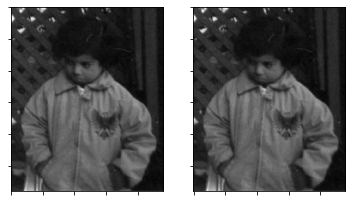

In [12]:
'''
Apesar alonga para ficar entre 0 e 255
Como a imagem já possuia uma amplitude grande de intensidade, não houve muita diferença
referência: https://scikit-image.org/docs/stable/api/skimage.exposure.html#skimage.exposure.equalize_hist
'''
img2 = rescale_intensity(img)
print(f'Transformada: de {img2.min()} à {img2.max()}')
imshowpair(img, img2, cmap=plt.cm.gray)

Transformada: de 1.43184421534937e-05 à 1.0


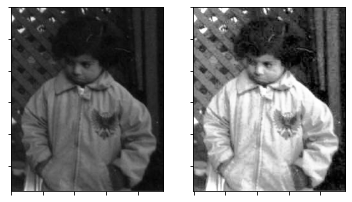

In [13]:
'''
Agora todos os tons aparecem com a mesma frequência, 
o que efetivamente distribuiu a informação ao longo de 
toda a aplitude de intensidades possíveis

Dessa forma, a garotinha ficou realçada
'''
img2 = equalize_hist(img)
print(f'Transformada: de {img2.min()} à {img2.max()}')
imshowpair(img, img2, cmap=plt.cm.gray)

Transformada: de 0.0 à 1.0


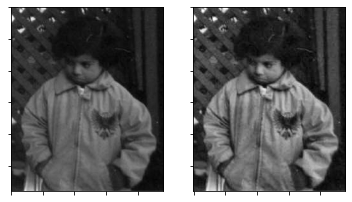

In [14]:
'''
Como a imagem era uniformemente acizentada, essa transformação não ajudou muito

caso houvessem regioes muito escuras e regiões muito claras o resultado provavelmente seria melhor
'''
img2 = equalize_adapthist(img)
print(f'Transformada: de {img2.min()} à {img2.max()}')
imshowpair(img, img2, cmap=plt.cm.gray)

8. De forma semelhante, aplique uma das técnicas de equalização de histograma para realçar a imagem _dentalradiograph_ [7].

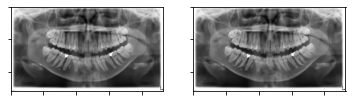

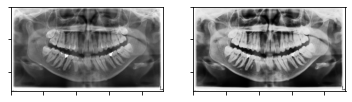

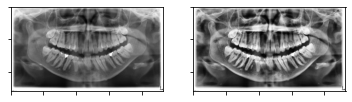

In [15]:
img = io.imread('DentalRadiograph.png')
for f in [rescale_intensity, equalize_hist, equalize_adapthist]:
    img2 = f(img)
    imshowpair(img, img2, cmap=plt.cm.gray)
    plt.show()
#agora parece que a equalize_adapthist permitiu uma melhor identificação dos dentes

## Referências
[1] https://pypi.org/project/imshowpair/

[2] http://fmwconcepts.com/imagemagick/otsuthresh/images/fingerprint.jpg

[3] http://homepages.inf.ed.ac.uk/rbf/HIPR2/images/son1.gif ou https://www.mathworks.com/help/examples/images/win64/BinarizeImagesWithDarkerForegroundThanBackgroundExample_01.png

[4] https://scikit-image.org/docs/stable/auto_examples/applications/plot_thresholding.html

[5] http://www.johnloomis.org/ece563/notes/enhancement/scale/pout.jpg

[6] https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_equalize.html

[7] https://imagej.nih.gov/ij/images/DentalRadiograph.png

[8] http://www.mathworks.com/help/releases/R2016b/examples/images/CompareResultsOfAveragingFilterAndMedianFilterExample_02.png


## Bibliografia
https://opensource.com/article/19/3/python-image-manipulation-tools

https://www.mathworks.com/examples/image/mw/images-ex28564424-create-image-histogram

https://www.mathworks.com/examples/image/mw/images-ex57959084-basic-image-enhancement-and-analysis-techniques

http://www.mathworks.com/help/images/ref/imbinarize.html

http://blogs.mathworks.com/steve/2016/06/14/image-binarization-otsus-method

https://www.mathworks.com/examples/image/mw/images-ex97343802-contrast-enhancement-techniques

https://www.mathworks.com/examples/image/mw/images-ex74217292-remove-noise-using-an-averaging-filter-and-a-median-filter

https://www.mathworks.com/examples/image/mw/images-ex48835658-detect-edges-in-images

https://www.mathworks.com/examples/image/mw/images-ex80028725-trace-boundaries-of-objects-in-images

https://www.mathworks.com/examples/image/mw/images-ex45754758-filter-images-using-predefined-filters

https://www.mathworks.com/examples/image/community/18507-missing-planes